
#  - Asset Management & Portfolio Construction


**1. Investment Objective and Risk Tolerance:**
Decide what your goals for this portfolio are. It could be retirement savings, saving for a home, etc. Determine the level of risk that you are willing to accept. Risk tolerance will also be influenced by factors like the investment time horizon and financial needs.

**2. Asset Selection:**
Identify the types of assets to include in your portfolio. These can include stocks, bonds, ETFs, real estate, commodities, etc. This step can involve fundamental analysis, which includes evaluating company financials, industry position, market conditions, etc., and technical analysis, which looks at trends in price and volume. 

**3. Stock Selection:**
Within the category of equities (stocks), use a systematic strategy to choose which stocks to invest in. This might involve factors like company size, sector, geographic region, growth prospects, valuation, etc.

**4. Efficient Frontier and Asset Allocation:**
The efficient frontier is a concept from Modern Portfolio Theory. It refers to the set of portfolios that provide the highest expected return for a given level of risk. Use optimization techniques to identify where on the efficient frontier your portfolio should be, based on your risk tolerance and return objectives. This will give you the ideal asset allocation for your portfolio.

**5. Portfolio Construction:**
Now that you've decided on an asset allocation, go ahead and build your portfolio. Be sure to diversify across and within asset classes to reduce risk.

**6. Prediction:**
Attempt to forecast future performance of your portfolio. This may involve techniques like Monte Carlo simulations, using past data to predict future returns, or estimating future performance based on economic indicators. Remember, predictions are just estimates and are not guarantees of future performance.

**7. Backtesting:**
Use historical data to see how your portfolio would have performed in the past. This will help you to see if your portfolio meets your investment objectives and risk tolerance. 

**8. Risk Management:**
Implement strategies to manage risk. This could involve regularly rebalancing your portfolio to maintain your desired asset allocation, using derivatives to hedge against risk, or setting stop-loss orders to limit potential losses.

**9. Portfolio Review and Rebalancing:**
Regularly review your portfolio to ensure it still aligns with your investment goals and risk tolerance. Over time, some assets may perform better than others, causing your portfolio to drift from its target allocation. If this happens, you'll need to rebalance your portfolio by selling assets that have increased in proportion and buying those that have decreased.

**10. Reporting:**
Keep track of portfolio performance and report on it periodically. This helps in assessing whether the portfolio is on track to achieve its objectives.

There are several strategies to determine the weights of assets in a portfolio. The right strategy for you will depend on your investment objectives, risk tolerance, time horizon, and other factors. Here are some common strategies:

**1. Equal Weighting:**
This is the simplest strategy where each asset is given the same weight. For example, if you have 10 assets, each would have a weight of 10%. This approach is easy to understand and implement and does not require any predictions about future returns or risk.

**2. Market Capitalization Weighting:**
In this strategy, the weight of each asset is proportional to its market capitalization. This means that larger companies will have a larger weight in the portfolio. Most of the major indices, like the S&P 500, are market cap-weighted.

**3. Risk Parity:**
The risk parity approach assigns weights to assets based on their risk, with the goal of equalizing the contribution of each asset to the total portfolio risk. This approach often requires more sophisticated risk models and may result in a more balanced portfolio, especially in terms of risk contribution from each asset.

**4. Mean-Variance Optimization:**
This approach is based on modern portfolio theory. It involves finding the portfolio weights that minimize the portfolio variance (risk) for a given expected return, or maximize the expected return for a given level of risk. This involves making predictions about future returns and risk, and requires a more sophisticated understanding of finance and mathematics.

**5. Factor-Based Weighting:**
In factor-based weighting, weights are assigned based on certain characteristics, or "factors," such as value, size, momentum, quality, and volatility. This strategy is often used in "smart beta" strategies and requires a solid understanding of both the factors used and the overall factor investing framework.

**6. Minimum Variance Portfolio:**
This strategy aims to create a portfolio with the lowest possible risk. It involves finding the weights that will minimize the portfolio variance, regardless of the expected returns.

Remember, each of these methods has its advantages and disadvantages, and may be more suitable for certain types of investors or market conditions. It's also possible to combine different methods or to change methods over time as your investment goals and risk tolerance evolve.


## Essential Libraries

In [1]:
import wrds
import pandas as pd
import numpy as np
#from pypfopt.expected_returns import mean_historical_return
#from pypfopt.risk_models import CovarianceShrinkage
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Dataset

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock list
stocklist_mag = ['MSFT', 'NVDA', 'AMD', 'ASML', 'INTC', 'MU', 'TSM', 'GOOG', 'AAPL', 'JPM', 'TSLA', 'ARKK', 'AVGO', 'CRM', 'AMZN', 'XOM', 'META', 'ENPH', 'VGT', 'UNG', 'XLF', 'DJIA']
stocklist_mag_nodjia = ['MSFT', 'NVDA', 'AMD', 'ASML', 'INTC', 'MU', 'TSM', 'GOOG', 'AAPL', 'JPM', 'TSLA', 'ARKK', 'AVGO', 'CRM', 'AMZN', 'XOM', 'META', 'ENPH', 'VGT', 'UNG', 'XLF']

# Create a list to store the DataFrames
dfs = []

# Calculate the date range
end_date = datetime.today()
start_date = end_date - timedelta(days=3*365)

# Fetch data for each stock
for stock in stocklist_mag:
    # Fetch the historical data for 5 years using yfinance
    data = yf.download(stock, start=start_date, end=end_date)

    # Extract the 'Close' column from the data
    data['TICKER'] = stock
    data.reset_index(inplace=True)
    data = data[['Date', 'TICKER', 'Close']]
    data.columns = ['Date', 'TICKER', 'Close']

    # Append the DataFrame to the list
    dfs.append(data)

# Concatenate all the DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
print(df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Riskfree

In [3]:
import yfinance as yf
from datetime import datetime, timedelta

# Calculate the start and end dates for the last 5 years
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')

# Acquiring risk-free rates from Yahoo Finance for the last 5 years (T-bills)
risk_free_df = yf.download('^IRX', start=start_date, end=end_date)
risk_free_df['Log_Return'] = np.log(risk_free_df['Adj Close'] / risk_free_df['Adj Close'].shift(1))
risk_free_df = risk_free_df['Log_Return']


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Portfolio

## Exploratory Data Analysis
Some of the companies changed their names and tickers due to operational changes and company mergers. The raw data pool combined them altogther. 

There are noise in the data needed to be removed. 

In [4]:
# Set the index of the DataFrame to the stock name
df_reduced = df[['Date','TICKER', 'Close']]
df_reshaped = df_reduced.pivot(index='Date', columns='TICKER', values='Close')

In [5]:
# Second dataframe (only DJIA)
df_djia = df_reduced[df_reduced['TICKER'] == 'DJIA']
# First dataframe (excluding DJIA)
df_excluding_djia = df_reduced[df_reduced['TICKER'] != 'DJIA']

In [6]:
djia = df_djia.pivot(index='Date', columns='TICKER', values='Close')
df_reshaped = df_excluding_djia.pivot(index='Date', columns='TICKER', values='Close')

# Calculate Return

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def calc_excess_returns(price_data, djia, resample=None, ret_type="arithmatic"):
    # calculate returns for all assets
    if ret_type == "arithmatic":
        ret = price_data.pct_change().dropna()
    elif ret_type == "log":
        ret = np.log(price_data / price_data.shift()).dropna()
    else:
        raise ValueError("ret_type: return calculation type is not valid. use \"arithmatic\" or \"log\"")

    # calculate returns for DJIA
    if ret_type == "arithmatic":
        ret_djia = djia.pct_change().dropna()
    elif ret_type == "log":
        ret_djia = np.log(djia / djia.shift()).dropna()

    # resample if needed
    if resample is not None:
        if ret_type == "arithmatic":
            ret = ret.resample(resample).apply(lambda df: (df + 1).cumprod(axis=0).iloc[-1]) - 1
            ret_djia = ret_djia.resample(resample).apply(lambda df: (df + 1).cumprod(axis=0).iloc[-1]) - 1
        elif ret_type == "log":
            ret = ret.resample(resample).apply(lambda df: df.sum(axis=0))
            ret_djia = ret_djia.resample(resample).apply(lambda df: df.sum(axis=0))
    
    excess_ret = ret.join(ret_djia, how='inner', lsuffix='_ret', rsuffix='_djia')
    #excess_ret = excess_ret.reindex(columns=price_data.columns)
    excess_ret = excess_ret.subtract(excess_ret['DJIA'], axis=0).drop(columns='DJIA')
    return excess_ret


# Cov Matrix and Weights

In [8]:
def calc_excess_returns_stats(returns):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return(mean_returns, cov_matrix)

def portfolio(weights, mean_returns, cov_matrix):

    portfolio_return = np.dot(weights.reshape(1,-1), mean_returns.values.reshape(-1,1))
    portfolio_var = np.dot(np.dot(weights.reshape(1,-1), cov_matrix.values), weights.reshape(-1,1))
    portfolio_std = np.sqrt(portfolio_var)
    return(np.squeeze(portfolio_return),np.squeeze(portfolio_var),np.squeeze(portfolio_std))

## Market Return & RF

In [9]:
djia['Log_Return'] = np.log(djia['DJIA'] / djia['DJIA'].shift(1))
avg_log_return = djia['Log_Return'].mean()
market_return = avg_log_return * 252
djia = djia.drop(columns=['Log_Return'])
risk_free_rate = risk_free_df.mean()*252


# Monte Carlo Simulation

In [10]:
num_iter = 9

max_sharpe = 0
max_sharpe_std = None
max_sharpe_ret = None
max_sharpe_w = None

# Initializing maximum Treynor ratio and its corresponding weights
max_treynor = 0
max_treynor_std = None
max_treynor_ret = None
max_treynor_w = None

# Initializing maximum Jensen's alpha and its corresponding weights
max_jensen_alpha = 0
max_jensen_std = None
max_jensen_ret = None
max_jensen_alpha_w = None


max_return_w = None
max_return_std = None
max_return_ret = 0

min_variance = np.inf
min_variance_w = None
min_variance_std = np.inf
min_variance_ret = None

daily_ret = calc_excess_returns(df_reshaped, djia, resample=None, ret_type="log")
mean_returns, cov_matrix = calc_excess_returns_stats(daily_ret)

for i in range(1,num_iter+1):
    # Sharpe Ratio
    rand_weights_sharpe = np.random.random(len(stocklist_mag_nodjia))
    rand_weights_sharpe = rand_weights_sharpe/np.sum(rand_weights_sharpe)
    portfolio_ret_sharpe, portfolio_var_sharpe, portfolio_std_sharpe = portfolio(rand_weights_sharpe, mean_returns, cov_matrix)
    # Annualizing
    portfolio_ret_sharpe = portfolio_ret_sharpe * 252
    portfolio_var_sharpe = portfolio_var_sharpe * 252
    portfolio_std_sharpe = portfolio_std_sharpe * (252**0.5)

    sharpe = (portfolio_ret_sharpe - risk_free_rate) / portfolio_std_sharpe
    if sharpe > max_sharpe:
        max_sharpe = sharpe
        max_sharpe_std = portfolio_std_sharpe
        max_sharpe_ret = portfolio_ret_sharpe
        max_sharpe_w = rand_weights_sharpe

    # calculate Treynor Ratio
    rand_weights_tryenor = np.random.random(len(stocklist_mag_nodjia))
    rand_weights_tryenor = rand_weights_tryenor/np.sum(rand_weights_tryenor)
    portfolio_ret_tryenor, portfolio_var_tryenor, portfolio_std_tryenor = portfolio(rand_weights_tryenor, mean_returns, cov_matrix)
    portfolio_beta_tryenor = portfolio_var_tryenor / djia['DJIA'].var()

    portfolio_ret_tryenor = portfolio_ret_tryenor * 252
    portfolio_var_tryenor = portfolio_var_tryenor * 252
    portfolio_std_tryenor = portfolio_std_tryenor * (252**0.5)

    treynor_ratio = (portfolio_ret_tryenor - risk_free_rate) / portfolio_beta_tryenor
    if treynor_ratio > max_treynor:   # update max Treynor ratio and its weights
        max_treynor = treynor_ratio
        max_treynor_std = portfolio_std_tryenor
        max_treynor_ret = portfolio_ret_tryenor
        max_treynor_w = rand_weights_tryenor

    # calculate Jensen's Alpha
    rand_weights_jensen = np.random.random(len(stocklist_mag_nodjia))
    rand_weights_jensen = rand_weights_jensen/np.sum(rand_weights_jensen)
    portfolio_ret_jensen, portfolio_var_jensen, portfolio_std_jensen = portfolio(rand_weights_jensen, mean_returns, cov_matrix)
    portfolio_beta_jensen = portfolio_var_jensen / djia['DJIA'].var()

    portfolio_ret_jensen = portfolio_ret_jensen * 252
    portfolio_var_jensen = portfolio_var_jensen * 252
    portfolio_std_jensen = portfolio_std_jensen * (252**0.5)

    jensen_alpha = portfolio_ret_jensen - (risk_free_rate + portfolio_beta_jensen * (market_return - risk_free_rate))
    if jensen_alpha > max_jensen_alpha:   # update max Jensen's alpha and its weights
        max_jensen_alpha = jensen_alpha
        max_jensen_std = portfolio_std_jensen
        max_jensen_ret = portfolio_ret_jensen
        max_jensen_alpha_w = rand_weights_jensen

    
    # calculate max return
    rand_weights_maxrt = np.random.random(len(stocklist_mag_nodjia))
    rand_weights_maxrt = rand_weights_maxrt/np.sum(rand_weights_maxrt)
    portfolio_ret_maxrt, portfolio_var_maxrt, portfolio_std_maxrt = portfolio(rand_weights_maxrt, mean_returns, cov_matrix)
    # Annualizing
    portfolio_ret_maxrt = portfolio_ret_maxrt * 252
    portfolio_var_maxrt = portfolio_var_maxrt * 252
    portfolio_std_maxrt = portfolio_std_maxrt * (252**0.5)
    
    # Check for max return
    if portfolio_ret_maxrt > max_return_ret:
        max_return_ret = portfolio_ret_maxrt
        max_return_std = portfolio_std_maxrt
        max_return_w = rand_weights_maxrt
        
    # calculate min std
    rand_weights_minvr = np.random.random(len(stocklist_mag_nodjia))
    rand_weights_minvr = rand_weights_minvr/np.sum(rand_weights_minvr)
    portfolio_ret_minvr, portfolio_var_minrt, portfolio_std_minvr = portfolio(rand_weights_minvr, mean_returns, cov_matrix)
    # Annualizing
    portfolio_ret_minvr = portfolio_ret_minvr * 252
    portfolio_var_minrt = portfolio_var_minrt * 252
    portfolio_std_minvr = portfolio_std_minvr * (252**0.5)

    # Check for std
    if portfolio_std_minvr < min_variance_std and portfolio_ret_minvr > 0:  # Adding condition for positive returns
        min_variance_ret = portfolio_ret_minvr
        min_variance_std = portfolio_std_minvr
        min_variance_w = rand_weights_minvr

#print("\nMax Sharpe Ratio Weights:", max_sharpe_w)
print("Return for max Sharpe Ratio: {:.3f}%".format(max_sharpe_ret*100))
print("Std for max Sharpe Ratio: {:.3f}%".format(max_sharpe_std*100))

#print("\nMax Treynor Ratio Weights:", max_treynor_w)
print("Return for max Treynor Ratio: {:.3f}%".format(max_treynor_ret*100))
print("Std for max Treynor Ratio: {:.3f}%".format(max_treynor_std*100))

#print("\nMax Jensen's Alpha Weights:", max_jensen_alpha_w)
print("Return for max Jensen's Alpha: {:.3f}%".format(max_jensen_ret*100))
print("Std for max Jensen's Alpha: {:.3f}%".format(max_jensen_std*100))

print("Return for max Return: {:.3f}%".format(max_return_ret*100))
print("Std for max Return: {:.3f}%".format(max_return_std*100))

print("Return for min variance: {:.3f}%".format(min_variance_ret*100))
print("Std for min variance: {:.3f}%".format(min_variance_std*100))

# print out the weights associated with each stock in 'stocklist_mag_nodjia'
weights_dict = {stock: "{:.3f}%".format(weight*100) for stock, weight in zip(stocklist_mag_nodjia, max_sharpe_w)}
print("\nStock weights for Max Sharpe Ratio:", weights_dict)

weights_dict = {stock: "{:.3f}%".format(weight*100) for stock, weight in zip(stocklist_mag_nodjia, max_treynor_w)}
print("\nStock weights for Max Treynor Ratio:", weights_dict)

weights_dict = {stock: "{:.3f}%".format(weight*100) for stock, weight in zip(stocklist_mag_nodjia, max_jensen_alpha_w)}
print("\nStock weights for Max Jensen's Alpha:", weights_dict)

Return for max Sharpe Ratio: 12.479%
Std for max Sharpe Ratio: 30.217%
Return for max Treynor Ratio: 11.510%
Std for max Treynor Ratio: 26.923%
Return for max Jensen's Alpha: 10.267%
Std for max Jensen's Alpha: 24.103%
Return for max Return: 13.286%
Std for max Return: 26.594%
Return for min variance: 10.296%
Std for min variance: 24.117%

Stock weights for Max Sharpe Ratio: {'MSFT': '2.993%', 'NVDA': '2.705%', 'AMD': '5.491%', 'ASML': '8.997%', 'INTC': '5.039%', 'MU': '4.096%', 'TSM': '5.717%', 'GOOG': '7.051%', 'AAPL': '6.471%', 'JPM': '4.186%', 'TSLA': '2.267%', 'ARKK': '8.676%', 'AVGO': '2.375%', 'CRM': '0.425%', 'AMZN': '8.553%', 'XOM': '6.663%', 'META': '8.052%', 'ENPH': '1.371%', 'VGT': '8.370%', 'UNG': '0.263%', 'XLF': '0.238%'}

Stock weights for Max Treynor Ratio: {'MSFT': '1.280%', 'NVDA': '7.398%', 'AMD': '2.724%', 'ASML': '4.643%', 'INTC': '5.389%', 'MU': '5.263%', 'TSM': '11.013%', 'GOOG': '2.444%', 'AAPL': '3.488%', 'JPM': '3.379%', 'TSLA': '2.338%', 'ARKK': '6.964%', 'A

In [11]:
import pandas as pd

# Creating dictionary for all portfolio weights
portfolios_dict = {
    'Max Sharpe Ratio': max_sharpe_w,
    'Max Treynor Ratio': max_treynor_w,
    'Max Jensen Alpha': max_jensen_alpha_w,
    'Max Return': max_return_w,
    'Min Variance': min_variance_w
}

# Creating DataFrame
df_portfolios = pd.DataFrame(portfolios_dict, index=stocklist_mag_nodjia)

# Convert to percentage and round to 3 decimal places
df_portfolios = df_portfolios.applymap(lambda x: round(x*100, 3))

print(df_portfolios)

      Max Sharpe Ratio  Max Treynor Ratio  Max Jensen Alpha  Max Return  \
MSFT             2.993              1.280             2.970       2.955   
NVDA             2.705              7.398             1.333       4.934   
AMD              5.491              2.724             6.806       1.257   
ASML             8.997              4.643             5.526       6.533   
INTC             5.039              5.389             7.254       3.343   
MU               4.096              5.263             3.350       3.607   
TSM              5.717             11.013             7.526       2.900   
GOOG             7.051              2.444             2.224       7.401   
AAPL             6.471              3.488             8.179       1.902   
JPM              4.186              3.379             6.150       3.498   
TSLA             2.267              2.338             7.377       9.322   
ARKK             8.676              6.964             8.384       8.443   
AVGO             2.375   

# backtesting and prediction


### Back Testing

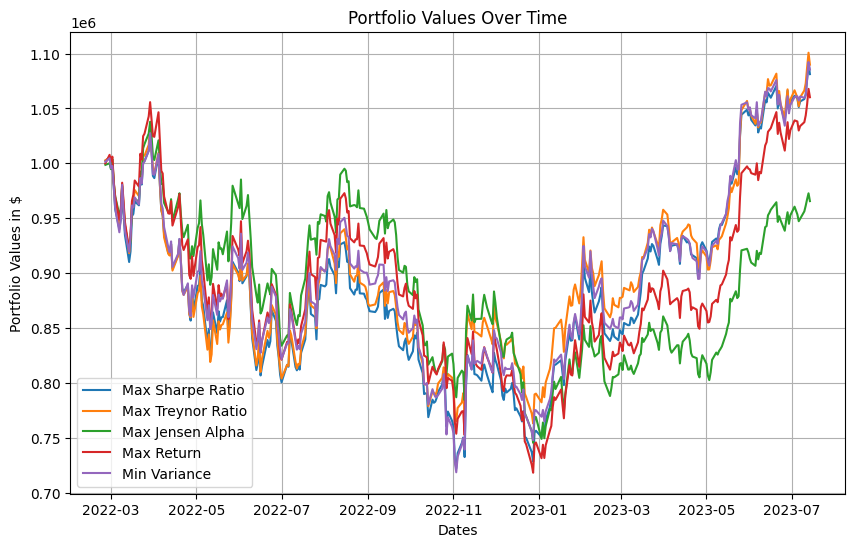

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming daily_ret and df_portfolios are your DataFrames

# Convert percentage weights to decimal form
df_portfolios = df_portfolios / 100

# Create empty dataframe to store portfolio values
portfolio_values = pd.DataFrame(index=daily_ret.index)

# Calculate portfolio values
for portfolio in df_portfolios.columns:
    weights = df_portfolios[portfolio]
    portfolio_daily_ret = (daily_ret * weights).sum(axis=1)
    portfolio_value = 1000000 * (1 + portfolio_daily_ret).cumprod()
    portfolio_values[portfolio] = portfolio_value

# Plotting
plt.figure(figsize=(10, 6))
for portfolio in df_portfolios.columns:
    plt.plot(portfolio_values.index, portfolio_values[portfolio], label=portfolio)
plt.title('Portfolio Values Over Time')
plt.xlabel('Dates')
plt.ylabel('Portfolio Values in $')
plt.legend()
plt.grid(True)
plt.show()

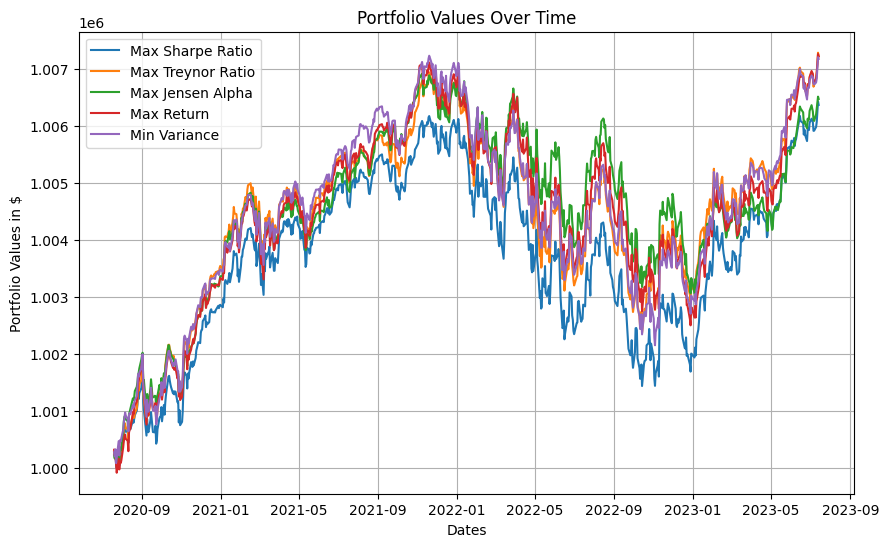

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_reshaped and df_portfolios are your DataFrames

# Convert price to return
daily_ret = df_reshaped.pct_change()

# Drop the first row of daily_ret because it's NaN after pct_change
daily_ret = daily_ret.dropna()

# Convert percentage weights to decimal form
df_portfolios = df_portfolios / 100

# Create empty dataframe to store portfolio values
portfolio_values = pd.DataFrame(index=daily_ret.index)

# Calculate portfolio values
for portfolio in df_portfolios.columns:
    weights = df_portfolios[portfolio]
    portfolio_daily_ret = (daily_ret * weights).sum(axis=1)
    portfolio_value = 1000000 * (1 + portfolio_daily_ret).cumprod()
    portfolio_values[portfolio] = portfolio_value

# Plotting
plt.figure(figsize=(10, 6))
for portfolio in df_portfolios.columns:
    plt.plot(portfolio_values.index, portfolio_values[portfolio], label=portfolio)
plt.title('Portfolio Values Over Time')
plt.xlabel('Dates')
plt.ylabel('Portfolio Values in $')
plt.legend()
plt.grid(True)
plt.show()

# Prediction

## CAPM

In [14]:
import statsmodels.api as sm

# Initialize list to hold betas
betas = []

# Calculate the beta for each stock
for stock in stocklist_mag_nodjia:
    # Calculate percentage changes and drop NaN values
    stock_returns = df_reshaped[stock].pct_change().dropna()
    market_returns = djia['DJIA'].pct_change().dropna()

    # Align the indices
    stock_returns, market_returns = stock_returns.align(market_returns, join='inner')

    # Run linear regression to find the beta
    model = sm.OLS(stock_returns, sm.add_constant(market_returns))
    results = model.fit()
    betas.append(results.params['DJIA'])

# Convert list of betas to a pandas DataFrame
df_betas = pd.DataFrame(betas, index=stocklist_mag_nodjia, columns=['Beta'])

# Calculate the expected return for the next year for each stock using CAPM
df_betas['Expected Return'] = risk_free_rate + df_betas['Beta'] * (market_return - risk_free_rate)

# Show the expected returns
print(df_betas)

          Beta  Expected Return
MSFT  1.392370        -0.104053
NVDA  2.350797        -0.208970
AMD   2.176333        -0.189872
ASML  2.000606        -0.170635
INTC  1.463126        -0.111798
MU    1.602284        -0.127032
TSM   1.278075        -0.091541
GOOG  1.335309        -0.097806
AAPL  1.418407        -0.106903
JPM   1.282305        -0.092004
TSLA  1.760233        -0.144322
ARKK  2.152441        -0.187257
AVGO  1.479968        -0.113642
CRM   1.520883        -0.118121
AMZN  1.761911        -0.144506
XOM   0.762852        -0.035140
META  1.729127        -0.140917
ENPH  1.539798        -0.120192
VGT   1.480888        -0.113743
UNG   0.739227        -0.032554
XLF   1.230449        -0.086328


# Combined

In [15]:
# These are the weights for each strategy
weights = np.array([0.2, 0.3, 0.1, 0.2, 0.2])

# Combine the weightings
combined_w = weights[0] * max_sharpe_w + weights[1] * max_treynor_w + weights[2] * max_jensen_alpha_w + weights[3] * max_return_w + weights[4] * min_variance_w

# If you want the result as a list
combined_w = combined_w.tolist()

print(combined_w)

[0.04174842108887814, 0.03903181217980221, 0.04331195643211749, 0.06289345110769515, 0.04387792576200017, 0.03743628953246268, 0.08122945840047963, 0.06184599650885707, 0.040795950414381166, 0.03308602150267794, 0.04591980400276913, 0.07381033120382456, 0.06004734637095248, 0.023467775198087626, 0.06219069271388283, 0.028656137161358838, 0.05118878714351894, 0.03240337138798487, 0.057010776122760495, 0.020626513250089285, 0.05942118251541929]


In [16]:
# Pair each stock with its weight
combined_stock_w = list(zip(stocklist_mag_nodjia, combined_w))

# Convert to DataFrame
combined_stock_weights = pd.DataFrame(combined_stock_w, columns=['Stock', 'Weight'])

print(combined_stock_weights)

   Stock    Weight
0   MSFT  0.041748
1   NVDA  0.039032
2    AMD  0.043312
3   ASML  0.062893
4   INTC  0.043878
5     MU  0.037436
6    TSM  0.081229
7   GOOG  0.061846
8   AAPL  0.040796
9    JPM  0.033086
10  TSLA  0.045920
11  ARKK  0.073810
12  AVGO  0.060047
13   CRM  0.023468
14  AMZN  0.062191
15   XOM  0.028656
16  META  0.051189
17  ENPH  0.032403
18   VGT  0.057011
19   UNG  0.020627
20   XLF  0.059421


# How many stocks

In [17]:
# Create a DataFrame for the combined weights

budget = 1037074


combined_stock_weights = pd.DataFrame({
    'Stock': stocklist_mag_nodjia,
    'Weight': combined_w
})

# Create a new column for the number of stocks to buy
combined_stock_weights['Num_Stocks'] = 0

for i in range(len(combined_stock_weights)):
    # Get the latest closing price for the stock
    stock = combined_stock_weights.loc[i, 'Stock']
    price = df[df['TICKER'] == stock]['Close'].iloc[-1]

    # Calculate how many stocks to buy
    money_for_this_stock = budget * combined_stock_weights.loc[i, 'Weight']
    num_stocks = money_for_this_stock / price

    # Update the DataFrame
    combined_stock_weights.loc[i, 'Num_Stocks'] = num_stocks

print(combined_stock_weights)

   Stock    Weight   Num_Stocks
0   MSFT  0.041748   125.409000
1   NVDA  0.039032    89.025220
2    AMD  0.043312   387.421968
3   ASML  0.062893    86.503224
4   INTC  0.043878  1372.689408
5     MU  0.037436   605.870809
6    TSM  0.081229   801.226553
7   GOOG  0.061846   510.253592
8   AAPL  0.040796   221.870150
9    JPM  0.033086   229.102301
10  TSLA  0.045920   169.245270
11  ARKK  0.073810  1576.009387
12  AVGO  0.060047    70.082087
13   CRM  0.023468   106.125755
14  AMZN  0.062191   478.885907
15   XOM  0.028656   294.417813
16  META  0.051189   171.873478
17  ENPH  0.032403   188.854072
18   VGT  0.057011   131.835783
19   UNG  0.020627  3150.400696
20   XLF  0.059421  1799.245648
